In [1]:
import pandas as pd
data = pd.read_csv("data_kpu.csv", sep=";")
data.head(2)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Wed Dec 27 23:25:37 +0000 2023,1740151983099859248,@tvOneNews Inikah dampak data pemilih yg bocor...,0,0,0,0,in,1185713156116533254,1739977656098250894,JohnPhi42491333,https://twitter.com/JohnPhi42491333/status/174...
1,Wed Dec 27 09:30:53 +0000 2023,1739941915867718045,Bisa gak sih ada Mosi Tidak Percaya sama KPU? ...,1,3,4,21,in,267795457,1739941915867718045,AdamVelcro,https://twitter.com/AdamVelcro/status/17399419...


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   created_at           199 non-null    object
 1   id_str               199 non-null    int64 
 2   full_text            199 non-null    object
 3   quote_count          199 non-null    int64 
 4   reply_count          199 non-null    int64 
 5   retweet_count        199 non-null    int64 
 6   favorite_count       199 non-null    int64 
 7   lang                 199 non-null    object
 8   user_id_str          199 non-null    int64 
 9   conversation_id_str  199 non-null    int64 
 10  username             199 non-null    object
 11  tweet_url            199 non-null    object
dtypes: int64(7), object(5)
memory usage: 18.8+ KB


In [3]:
#statistik dataset
summary = data.describe()
summary.head()

,id_str,quote_count,reply_count,retweet_count,favorite_count,user_id_str,conversation_id_str
count,1.990000e+02,199.000000,199.000000,199.000000,199.000000,1.990000e+02,1.990000e+02
mean,1.731095e+18,0.527638,16.592965,4.587940,10.643216,6.999114e+17,1.731082e+18
std,2.012564e+15,1.989363,123.176395,17.710667,45.408453,7.419637e+17,2.001411e+15
min,1.729658e+18,0.000000,0.000000,0.000000,0.000000,1.712898e+07,1.729492e+18
25%,1.729817e+18,0.000000,0.000000,0.000000,0.000000,7.185517e+07,1.729817e+18


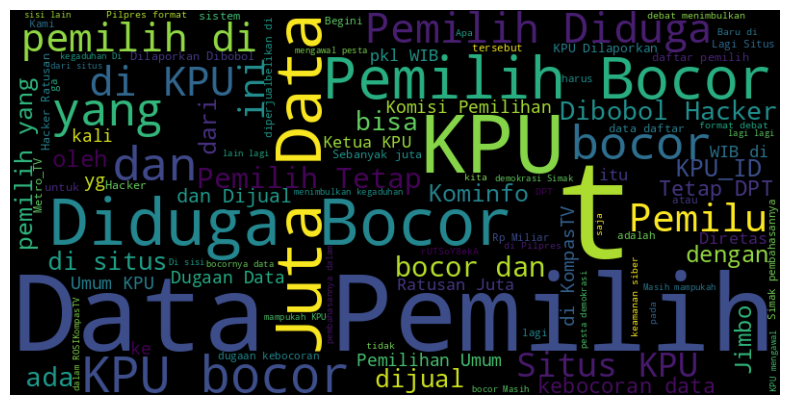

In [4]:
#vis original data wordcloud & frekuensi data
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
df = ' '.join(data['full_text'].tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])
wc = WordCloud(stopwords=stopwords, background_color="black", max_words=100, height=400, width= 800)
wc.generate(df)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

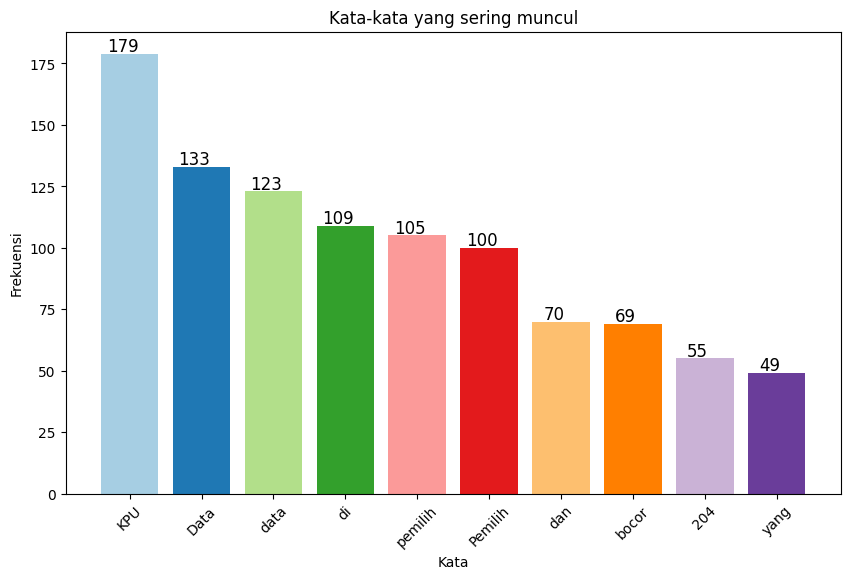

In [7]:
#kata yang sering muncul
import matplotlib.pyplot as plt
from collections import Counter

text=" ".join(data["full_text"])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)
word, count = zip(*top_words)

colors = plt.cm.Paired(range(len(word)))

plt.figure(figsize=(10, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.title("Kata-kata yang sering muncul")
plt.xticks(rotation=45)

for bar, num in zip(bars, count):
  plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num+ 1, str(num), fontsize=12, color='black', ha='center')

plt.show()

In [9]:
#pre-processing data
df = pd.DataFrame(data[['full_text']])
df.head()

,full_text
0,@tvOneNews Inikah dampak data pemilih yg bocor...
1,Bisa gak sih ada Mosi Tidak Percaya sama KPU? ...
2,@msaid_didu @Mazing93 Gibran dapet giliran PER...
3,"Y mau bagaimana lagi, Indonesia butuh seorang ..."
4,"204 Juta Data Pemilih Bocor Dibobol Hacker, KP..."


In [12]:
import re
import string
import nltk

def remove_URL(tweet):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', tweet)

def remove_html(tweet):
    html = re.compile(r'<.*?>')
    return html.sub(r'', tweet)

def remove_emoji(tweet):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

def remove_angka(tweet):
    tweet = re.sub('[0-9]+', '', tweet)
    tweet = re.sub(r'\$\w*', '', tweet)
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    return tweet

def remove_punct(tweets):
    translator = str.maketrans('', '', string.punctuation)
    return tweets.translate(translator)

df['cleansing'] = df['full_text'].apply(lambda x: remove_URL(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_html(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_emoji(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_punct(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_angka(x))

df.head()


,full_text,cleansing
0,@tvOneNews Inikah dampak data pemilih yg bocor...,tvOneNews Inikah dampak data pemilih yg bocor ...
1,Bisa gak sih ada Mosi Tidak Percaya sama KPU? ...,Bisa gak sih ada Mosi Tidak Percaya sama KPU S...
2,@msaid_didu @Mazing93 Gibran dapet giliran PER...,msaiddidu Mazing Gibran dapet giliran PERTAMA ...
3,"Y mau bagaimana lagi, Indonesia butuh seorang ...",Y mau bagaimana lagi Indonesia butuh seorang y...
4,"204 Juta Data Pemilih Bocor Dibobol Hacker, KP...",Juta Data Pemilih Bocor Dibobol Hacker KPU Bu...


In [13]:
#ubah menjadi huruf kecil semua (case folding dan tokenization)
df['Tokenization and Case Folding'] = df['cleansing'].apply(lambda x: x.lower().split())
df.head()

,full_text,cleansing,Tokenization and Case Folding
0,@tvOneNews Inikah dampak data pemilih yg bocor...,tvOneNews Inikah dampak data pemilih yg bocor ...,"[tvonenews, inikah, dampak, data, pemilih, yg,..."
1,Bisa gak sih ada Mosi Tidak Percaya sama KPU? ...,Bisa gak sih ada Mosi Tidak Percaya sama KPU S...,"[bisa, gak, sih, ada, mosi, tidak, percaya, sa..."
2,@msaid_didu @Mazing93 Gibran dapet giliran PER...,msaiddidu Mazing Gibran dapet giliran PERTAMA ...,"[msaiddidu, mazing, gibran, dapet, giliran, pe..."
3,"Y mau bagaimana lagi, Indonesia butuh seorang ...",Y mau bagaimana lagi Indonesia butuh seorang y...,"[y, mau, bagaimana, lagi, indonesia, butuh, se..."
4,"204 Juta Data Pemilih Bocor Dibobol Hacker, KP...",Juta Data Pemilih Bocor Dibobol Hacker KPU Bu...,"[juta, data, pemilih, bocor, dibobol, hacker, ..."


In [14]:
#filtering / stopword removal
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

df['Filtering/stopword removal'] = df['Tokenization and Case Folding'].apply(lambda x: remove_stopwords(x))
df.head()

,full_text,cleansing,Tokenization and Case Folding,Filtering/stopword removal
0,@tvOneNews Inikah dampak data pemilih yg bocor...,tvOneNews Inikah dampak data pemilih yg bocor ...,"[tvonenews, inikah, dampak, data, pemilih, yg,...","[tvonenews, dampak, data, pemilih, yg, bocor, ..."
1,Bisa gak sih ada Mosi Tidak Percaya sama KPU? ...,Bisa gak sih ada Mosi Tidak Percaya sama KPU S...,"[bisa, gak, sih, ada, mosi, tidak, percaya, sa...","[gak, sih, mosi, percaya, kpu, org, nya, pilih..."
2,@msaid_didu @Mazing93 Gibran dapet giliran PER...,msaiddidu Mazing Gibran dapet giliran PERTAMA ...,"[msaiddidu, mazing, gibran, dapet, giliran, pe...","[msaiddidu, mazing, gibran, dapet, giliran, vi..."
3,"Y mau bagaimana lagi, Indonesia butuh seorang ...",Y mau bagaimana lagi Indonesia butuh seorang y...,"[y, mau, bagaimana, lagi, indonesia, butuh, se...","[y, indonesia, butuh, yg, sok, sok, mengerti, ..."
4,"204 Juta Data Pemilih Bocor Dibobol Hacker, KP...",Juta Data Pemilih Bocor Dibobol Hacker KPU Bu...,"[juta, data, pemilih, bocor, dibobol, hacker, ...","[juta, data, pemilih, bocor, dibobol, hacker, ..."


In [17]:
#steamming data

!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [20]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df['stemming_data'] = df['Filtering/stopword removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head()


,full_text,cleansing,Tokenization and Case Folding,Filtering/stopword removal,stemming_data
0,@tvOneNews Inikah dampak data pemilih yg bocor...,tvOneNews Inikah dampak data pemilih yg bocor ...,"[tvonenews, inikah, dampak, data, pemilih, yg,...","[tvonenews, dampak, data, pemilih, yg, bocor, ...",tvonenews dampak data pilih yg bocor tsb kpu j...
1,Bisa gak sih ada Mosi Tidak Percaya sama KPU? ...,Bisa gak sih ada Mosi Tidak Percaya sama KPU S...,"[bisa, gak, sih, ada, mosi, tidak, percaya, sa...","[gak, sih, mosi, percaya, kpu, org, nya, pilih...",gak sih mosi percaya kpu org nya piliham mukid...
2,@msaid_didu @Mazing93 Gibran dapet giliran PER...,msaiddidu Mazing Gibran dapet giliran PERTAMA ...,"[msaiddidu, mazing, gibran, dapet, giliran, pe...","[msaiddidu, mazing, gibran, dapet, giliran, vi...",msaiddidu mazing gibran dapet gilir visi misi ...
3,"Y mau bagaimana lagi, Indonesia butuh seorang ...",Y mau bagaimana lagi Indonesia butuh seorang y...,"[y, mau, bagaimana, lagi, indonesia, butuh, se...","[y, indonesia, butuh, yg, sok, sok, mengerti, ...",y indonesia butuh yg sok sok erti nyata nya ko...
4,"204 Juta Data Pemilih Bocor Dibobol Hacker, KP...",Juta Data Pemilih Bocor Dibobol Hacker KPU Bu...,"[juta, data, pemilih, bocor, dibobol, hacker, ...","[juta, data, pemilih, bocor, dibobol, hacker, ...",juta data pilih bocor bobol hacker kpu buka suara


In [22]:
#drop data duplicate
df.drop_duplicates(subset="stemming_data", keep='first', inplace=True)
df.head()


,full_text,cleansing,Tokenization and Case Folding,Filtering/stopword removal,stemming_data
0,@tvOneNews Inikah dampak data pemilih yg bocor...,tvOneNews Inikah dampak data pemilih yg bocor ...,"[tvonenews, inikah, dampak, data, pemilih, yg,...","[tvonenews, dampak, data, pemilih, yg, bocor, ...",tvonenews dampak data pilih yg bocor tsb kpu j...
1,Bisa gak sih ada Mosi Tidak Percaya sama KPU? ...,Bisa gak sih ada Mosi Tidak Percaya sama KPU S...,"[bisa, gak, sih, ada, mosi, tidak, percaya, sa...","[gak, sih, mosi, percaya, kpu, org, nya, pilih...",gak sih mosi percaya kpu org nya piliham mukid...
2,@msaid_didu @Mazing93 Gibran dapet giliran PER...,msaiddidu Mazing Gibran dapet giliran PERTAMA ...,"[msaiddidu, mazing, gibran, dapet, giliran, pe...","[msaiddidu, mazing, gibran, dapet, giliran, vi...",msaiddidu mazing gibran dapet gilir visi misi ...
3,"Y mau bagaimana lagi, Indonesia butuh seorang ...",Y mau bagaimana lagi Indonesia butuh seorang y...,"[y, mau, bagaimana, lagi, indonesia, butuh, se...","[y, indonesia, butuh, yg, sok, sok, mengerti, ...",y indonesia butuh yg sok sok erti nyata nya ko...
4,"204 Juta Data Pemilih Bocor Dibobol Hacker, KP...",Juta Data Pemilih Bocor Dibobol Hacker KPU Bu...,"[juta, data, pemilih, bocor, dibobol, hacker, ...","[juta, data, pemilih, bocor, dibobol, hacker, ...",juta data pilih bocor bobol hacker kpu buka suara


In [23]:
#save dataset hasil pre-processing data
df.to_csv('hasil_preprocessing_data_kpu.csv',encoding='utf8', index=False)

In [24]:
#vis data baru
data = pd.read_csv("hasil_preprocessing_data_kpu.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   full_text                      183 non-null    object
 1   cleansing                      183 non-null    object
 2   Tokenization and Case Folding  183 non-null    object
 3   Filtering/stopword removal     183 non-null    object
 4   stemming_data                  183 non-null    object
dtypes: object(5)
memory usage: 7.3+ KB
